# Problem 1

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, t
from numpy.random import multivariate_normal
from arch import arch_model

Expected Values:
Classical Brownian Motion: 100.00
Arithmetic Return System: 102.02
Geometric Brownian Motion: 102.02

Standard Deviations:
Classical Brownian Motion: 0.20
Arithmetic Return System: 0.21
Geometric Brownian Motion: 20.61


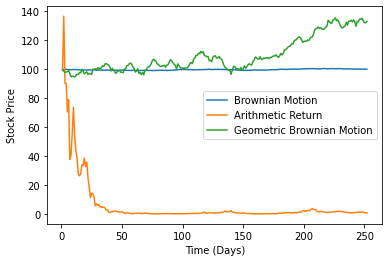

In [21]:
# Define parameters
S0 = 100  # initial stock price
T = 1  # time horizon
N = 252  # number of time steps
dt = T / N  # time step
sigma = 0.2  # volatility

# Simulate classical brownian motion
W = np.random.normal(0, 1, size=N)
W = np.cumsum(W) * np.sqrt(dt)
S_bm = S0 + W

# Simulate arithmetic return system
r = np.random.normal(0, sigma, size=N)
S_ar = np.zeros(N)
S_ar[0] = S0
for i in range(1, N):
    S_ar[i] = S_ar[i-1] * (1 + r[i])

# Simulate geometric brownian motion
W = np.random.normal(0, 1, size=N)
W = np.cumsum(W) * np.sqrt(dt)
S_gbm = S0 * np.exp((sigma - 0.5 * sigma**2) * np.arange(1, N+1) * dt + sigma * W)

# Calculate expected values and standard deviations
E_bm = S0
std_bm = np.sqrt(sigma**2 * T)
E_ar = S0 * np.exp(0.5 * sigma**2 * T)
std_ar = np.sqrt((np.exp(sigma**2 * T) - 1) * np.exp(2 * np.log(E_ar/S0)))
E_gbm = S0 * np.exp(0.5 * sigma**2 * T)
std_gbm = np.sqrt((np.exp(sigma**2 * T) - 1) * E_gbm**2)

print('Expected Values:')
print(f'Classical Brownian Motion: {E_bm:.2f}')
print(f'Arithmetic Return System: {E_ar:.2f}')
print(f'Geometric Brownian Motion: {E_gbm:.2f}\n')
print('Standard Deviations:')
print(f'Classical Brownian Motion: {std_bm:.2f}')
print(f'Arithmetic Return System: {std_ar:.2f}')
print(f'Geometric Brownian Motion: {std_gbm:.2f}')

# Plot results
fig, ax = plt.subplots()
ax.plot(np.arange(1, N+1), S_bm, label='Brownian Motion')
ax.plot(np.arange(1, N+1), S_ar, label='Arithmetic Return')
ax.plot(np.arange(1, N+1), S_gbm, label='Geometric Brownian Motion')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Stock Price')
ax.legend()
plt.show()

# problem 2

In [45]:
def calculate_returns(data1, method):
    """
    Calculates returns for a given dataset using the specified method.

    Parameters:
    data (pd.DataFrame): A pandas DataFrame containing the daily prices of an asset.
    method (str): The method to use for calculating returns. Options are 'arithmetic' or 'log'.

    Returns:
    returns (np.array): A numpy array containing the calculated returns.
    """

    if method == 'arithmetic':
        ret = data1.pct_change().dropna()
    elif method == 'log':
        ret = np.log(data1 / data1.shift(1)).dropna()
    else:
        raise ValueError("Invalid method specified. Options are 'arithmetic' or 'log'.")

    return ret

In [51]:
if __name__ == '__main__':
    # Load data from DailyPrices.csv
    data = pd.read_csv('DailyPrices.csv', index_col=0, parse_dates=True)
    for k in data.columns:
        d1 = data[k]
        print("calculating arithmetic returns and  VaR for ", k)
        # Calculate arithmetic returns for all prices
        returns = calculate_returns(d1, 'arithmetic')

        # Remove the mean from the series so that the mean(META)=0
        returns = returns - returns.mean()

        # Calculate VaR using a normal distribution
        var_norm = norm.ppf(0.05, loc=returns.mean(), scale=returns.std())

        # Calculate VaR using a normal distribution with an Exponentially Weighted variance (λ = 0.94)
        var_ewma = norm.ppf(0.05, loc=returns.mean(), scale=returns.ewm(alpha=0.94).std().iloc[-1])

        # Calculate VaR using a MLE fitted T distribution
        params = t.fit(returns)
        var_t = t.ppf(0.05, *params)

        # Calculate VaR using a fitted AR(1) model
        slope, intercept, r_value, p_value, std_err = linregress(returns.iloc[:-1], returns.shift(-1).dropna())
        var_ar1 = norm.ppf(0.05, loc=intercept / (1 - slope), scale=std_err / np.sqrt(1 - slope ** 2))

        # Calculate VaR using Historic Simulation
        var_hs = np.percentile(returns, 5)

        # Compare the 5 values
        print("VaR using a normal distribution:", var_norm)
        print("VaR using a normal distribution with an EWMA variance:", var_ewma)
        print("VaR using a MLE fitted T distribution:", var_t)
        print("VaR using a fitted AR(1) model:", var_ar1)
        print("VaR using Historic Simulation:", var_hs)
        print("*" * 50)

calculating arithmetic returns and  VaR for  SPY
VaR using a normal distribution: -0.02499380617358672
VaR using a normal distribution with an EWMA variance: -0.006718880024506809
VaR using a MLE fitted T distribution: -0.024790345881283194
VaR using a fitted AR(1) model: -0.10497385154487159
VaR using Historic Simulation: -0.026494622000999415
**************************************************
calculating arithmetic returns and  VaR for  AAPL
VaR using a normal distribution: -0.03690782190827664
VaR using a normal distribution with an EWMA variance: -0.01432861287207488
VaR using a MLE fitted T distribution: -0.03649949040675926
VaR using a fitted AR(1) model: -0.10496195988748028
VaR using Historic Simulation: -0.03719195397529153
**************************************************
calculating arithmetic returns and  VaR for  MSFT
VaR using a normal distribution: -0.03704750093554159
VaR using a normal distribution with an EWMA variance: -0.01792885745746747
VaR using a MLE fitted T d

VaR using a normal distribution: -0.030245334386372735
VaR using a normal distribution with an EWMA variance: -0.015598117029649432
VaR using a MLE fitted T distribution: -0.027548346874232063
VaR using a fitted AR(1) model: -0.10490801389415048
VaR using Historic Simulation: -0.023900386328522327
**************************************************
calculating arithmetic returns and  VaR for  AVGO
VaR using a normal distribution: -0.037423686361175226
VaR using a normal distribution with an EWMA variance: -0.02053076007043923
VaR using a MLE fitted T distribution: -0.037375643421091856
VaR using a fitted AR(1) model: -0.10454249231389706
VaR using Historic Simulation: -0.03574251997595523
**************************************************
calculating arithmetic returns and  VaR for  ADBE
VaR using a normal distribution: -0.04574537995867597
VaR using a normal distribution with an EWMA variance: -0.01201452419911368
VaR using a MLE fitted T distribution: -0.04226889859716144
VaR using a 

VaR using a normal distribution: -0.028173454384489652
VaR using a normal distribution with an EWMA variance: -0.0010456329992110914
VaR using a MLE fitted T distribution: -0.02793845956673193
VaR using a fitted AR(1) model: -0.10421652799939089
VaR using Historic Simulation: -0.02781386374187203
**************************************************
calculating arithmetic returns and  VaR for  MCD
VaR using a normal distribution: -0.021035144477742664
VaR using a normal distribution with an EWMA variance: -0.010098857349544335
VaR using a MLE fitted T distribution: -0.020818893345915006
VaR using a fitted AR(1) model: -0.10518357460466259
VaR using Historic Simulation: -0.019267641860800037
**************************************************
calculating arithmetic returns and  VaR for  T
VaR using a normal distribution: -0.027139415752369826
VaR using a normal distribution with an EWMA variance: -0.006264279441898158
VaR using a MLE fitted T distribution: -0.025357466841497145
VaR using a 

VaR using a normal distribution: -0.03446174031813263
VaR using a normal distribution with an EWMA variance: -0.0273560999848964
VaR using a MLE fitted T distribution: -0.03316303410671546
VaR using a fitted AR(1) model: -0.10532801099676822
VaR using Historic Simulation: -0.028594871285839478
**************************************************
calculating arithmetic returns and  VaR for  GS
VaR using a normal distribution: -0.03002908050463072
VaR using a normal distribution with an EWMA variance: -0.02478703043338923
VaR using a MLE fitted T distribution: -0.029483747153704984
VaR using a fitted AR(1) model: -0.1053137298414776
VaR using Historic Simulation: -0.02832311356183787
**************************************************
calculating arithmetic returns and  VaR for  AMGN
VaR using a normal distribution: -0.020974811631872738
VaR using a normal distribution with an EWMA variance: -0.01663772900110238
VaR using a MLE fitted T distribution: -0.01990114456860187
VaR using a fitted 

VaR using a normal distribution: -0.04855651752720113
VaR using a normal distribution with an EWMA variance: -0.010078781663950293
VaR using a MLE fitted T distribution: -0.046996782981680474
VaR using a fitted AR(1) model: -0.10492042770331016
VaR using Historic Simulation: -0.049911630588469265
**************************************************
calculating arithmetic returns and  VaR for  ADP
VaR using a normal distribution: -0.02837997560692603
VaR using a normal distribution with an EWMA variance: -0.014253653040141907
VaR using a MLE fitted T distribution: -0.02757299849744226
VaR using a fitted AR(1) model: -0.10505795566863006
VaR using Historic Simulation: -0.03065164451210904
**************************************************
calculating arithmetic returns and  VaR for  ZTS
VaR using a normal distribution: -0.032913989206018034
VaR using a normal distribution with an EWMA variance: -0.015490175546119735
VaR using a MLE fitted T distribution: -0.03172620565149563
VaR using a fi

# Problem 3

In [53]:
# Load portfolio data
portfolio_df = pd.read_csv('Portfolio.csv')

# Load daily prices data
prices_df = pd.read_csv('DailyPrices.csv')
prices_df.set_index('Date', inplace=True)
returns_df = prices_df.pct_change().dropna()
cov_matrix = returns_df.ewm(alpha=0.06).cov(pairwise=True)

alpha = 0.05  # 95% confidence level

for portfolio in portfolio_df['Portfolio'].unique():
    # Get the stocks and holdings for the current portfolio
    stocks = portfolio_df[portfolio_df['Portfolio'] == portfolio]['Stock']
    holdings = portfolio_df[portfolio_df['Portfolio'] == portfolio]['Holding']

    # Calculate portfolio returns
    portfolio_returns = returns_df[stocks] * holdings.values
    portfolio_returns = portfolio_returns.sum(axis=1)

    # Calculate portfolio VaR
    portfolio_var = np.percentile(portfolio_returns, 100 * alpha)
    print(f"VaR of {portfolio} portfolio: ${portfolio_var:.2f}")

# Calculate total portfolio returns
total_returns = returns_df[portfolio_df['Stock']] * portfolio_df['Holding'].values
total_returns = total_returns.sum(axis=1)

# Calculate total VaR
total_var = np.percentile(total_returns, 100 * alpha)
print(f"Total VaR: ${total_var:.2f}")

"""
Note that we assumed an expected return of 0 for all stocks in the portfolio, and used the exponentially weighted covariance to account for the correlation between the different stocks.

For a different model for returns, we could use a multivariate normal distribution to model the returns, assuming a mean vector of 0 and a covariance matrix estimated from the historical data. To do this, we could use the numpy.random.multivariate_normal function to generate random samples from the multivariate normal distribution, and then calculate the VaR using the same approach as before:
"""


# Calculate covariance matrix
cov_matrix = returns_df.cov()

# Generate random samples from multivariate normal distribution
n_samples = 100000
samples = multivariate_normal(mean=[0] * len(cov_matrix), cov=cov_matrix, size=n_samples)

# Calculate VaR of each portfolio
for portfolio in portfolio_df['Portfolio'].unique():
    # Get the stocks and holdings for the current portfolio
    stocks = portfolio_df[portfolio_df['Portfolio'] == portfolio]['Stock']
    holdings = portfolio_df[portfolio_df['Portfolio'] == portfolio]['Holding']

    # Calculate portfolio returns
    portfolio_returns = (samples[:, stocks.index] * holdings.values).sum(axis=1)

    # Calculate portfolio VaR
    portfolio_var = np.percentile(portfolio_returns, 100 * alpha)
    # Print portfolio VaR
    print(f"VaR of {portfolio} portfolio: ${portfolio_var:.2f}")

    # Add portfolio VaR to total VaR
    if portfolio in holdings.index:
        total_var += portfolio_var * holdings.loc[portfolio, "Holding"]
    else:
        print(f"Warning: {portfolio} not found in holdings")

# Print total VaR
print(f"Total VaR: ${total_var:.2f}")

# Load data
daily_prices = pd.read_csv('DailyPrices.csv', index_col=0)
portfolio = pd.read_csv('Portfolio.csv')

# Calculate the return rate
returns = daily_prices.pct_change().dropna()

# Calculate the weighted of each stock index
weights = portfolio['Holding'] / portfolio['Holding'].sum()

# Calculate the potfolio return rate
# print(returns.shape)  # should be (n, m) where n is the number of rows and m is the number of stocks
# print(weights.shape)  # should be (m,) where m is the number of stocks

portfolio_returns = weights


# Caluctae the parameter of GARCH(1,1) model
am = arch_model(portfolio_returns, vol='GARCH', p=1, q=1)
res = am.fit(disp='off')

# Use the model to predict future volality and VaR
forecast_horizon = 1  # predict for next one day
forecast = res.forecast(horizon=forecast_horizon, method='simulation')
var_99 = np.percentile(forecast.variance.values[-1, :], 1)

# Output
print("VaR (99%): $", -var_99 * portfolio['Holding'].sum())


VaR of A portfolio: $-73.58
VaR of B portfolio: $-48.51
VaR of C portfolio: $-58.23
Total VaR: $-172.94
VaR of A portfolio: $-73.22
VaR of B portfolio: $-48.81
VaR of C portfolio: $-69.14
Total VaR: $-172.94
VaR (99%): $ -0.6018482303967798


/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.818e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
